In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap
import math
import plotly.express as px
from random import randint
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

KeyboardInterrupt: 

In [ ]:
d = pd.read_csv(r"D:\Representational_drift_and_replay_analysis\Dimension Reduction\UMAP\neuralData_cross_validation.csv")

In [ ]:
# Select the good columns for the analysis
data = d.dropna()
allGoodCol = data.columns
allGoodCol = list(allGoodCol)
allGoodCol = allGoodCol[2::]

In [ ]:
# # Select the id of test laps and of the training laps
allId = data['lap'].unique()
# allPossiblePicks = list(allId)

# number_of_pick = 4

# iterations = math.floor(len(allPossiblePicks) / number_of_pick)

# # Generate the list of test laps
# testLaps = []

# for i in range(iterations):
#     testSet = []
#     for j in range(number_of_pick):
#         currentPick = randint(0, len(allPossiblePicks) - 1)
#         testSet.append(allPossiblePicks[currentPick])
#         allPossiblePicks.pop(currentPick)
    
#     testLaps.append(testSet)

# testLaps

## Lap separation decoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores = []

In [ ]:
# Now we run the UMAP for each test set

for i in range(1, len(allId) + 1):

    print("Training on train set " + str(i) + " of " + str(len(allId)) + "...")

    testData = data[data['lap'] == i]
    trainData = data[data['lap'] != i]

    reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

    parsedData = trainData[allGoodCol].values
    embedding = reducer.fit(parsedData, trainData['lap'])

    # Now we use a KNN decoder to see how well the UMAP is able to separate the different laps
    
    neigh = KNeighborsClassifier(n_neighbors = 10)
    neigh.fit(embedding.embedding_, trainData['lap'])

    # We now test the decoder on the test set
    test_embedding = embedding.transform(testData[allGoodCol].values)
    score = [abs(neigh.predict([test_embedding[i]])[0] - testData['lap'].iloc[i]) for i in range(len(testData))]
    scores.append(score)
    

    


Training on train set 1 of 16...
Training on train set 2 of 16...
Training on train set 3 of 16...
Training on train set 4 of 16...
Training on train set 5 of 16...
Training on train set 6 of 16...
Training on train set 7 of 16...
Training on train set 8 of 16...
Training on train set 9 of 16...
Training on train set 10 of 16...
Training on train set 11 of 16...
Training on train set 12 of 16...
Training on train set 13 of 16...
Training on train set 14 of 16...
Training on train set 15 of 16...
Training on train set 16 of 16...


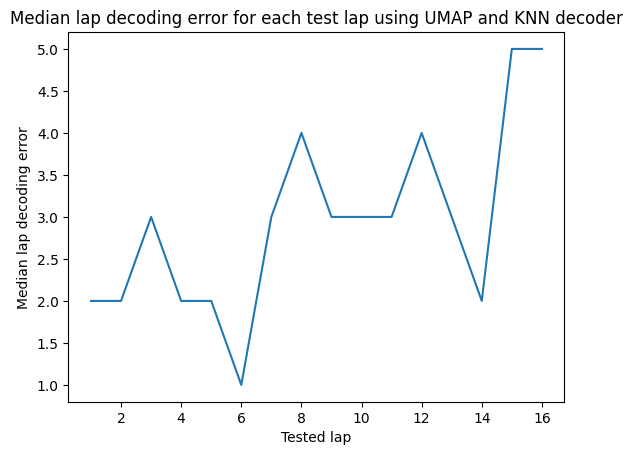

In [ ]:
# We get the mean score
plt.plot(range(1, len(allId) + 1), [np.median(scores[i]) for i in range(len(scores))])
plt.xlabel("Tested lap")
plt.ylabel("Median lap decoding error")
plt.title("Median lap decoding error for each test lap using UMAP and KNN decoder")
plt.show()

## Space separation decoder

In [ ]:
scores = []

allPos = [math.floor(data['x'][i]) for i in range(len(data))]
data['x'] = allPos

allLabelPos = list(set(allPos))

number_of_pick = 10

iterations = math.floor(len(allLabelPos) / number_of_pick)

# Generate the list of test laps
testLaps = []

for i in range(iterations):
    testSet = []
    for j in range(number_of_pick):
        currentPick = randint(0, len(allLabelPos) - 1)
        testSet.append(allLabelPos[currentPick])
        allLabelPos.pop(currentPick)
    
    testLaps.append(testSet)

testLaps

[[100, 152, 28, 10, 55, 83, 122, 105, 178, 184],
 [160, 20, 19, 17, 142, 11, 34, 157, 87, 3],
 [36, 38, 92, 175, 130, 159, 102, 112, 26, 123],
 [145, 136, 74, 68, 191, 30, 128, 63, 158, 189],
 [41, 108, 73, 57, 37, 12, 98, 85, 163, 6],
 [176, 188, 66, 186, 181, 89, 153, 70, 125, 111],
 [90, 174, 131, 154, 60, 21, 9, 1, 139, 155],
 [187, 107, 173, 97, 27, 56, 39, 115, 162, 94],
 [119, 117, 62, 95, 146, 81, 35, 47, 50, 0],
 [91, 88, 110, 76, 18, 29, 79, 72, 7, 49],
 [116, 14, 52, 126, 93, 25, 24, 71, 167, 61],
 [82, 161, 150, 16, 2, 118, 51, 13, 137, 4],
 [32, 5, 141, 120, 149, 166, 121, 96, 75, 185],
 [172, 127, 58, 135, 67, 78, 54, 168, 48, 22],
 [133, 165, 195, 182, 183, 31, 179, 156, 59, 46],
 [23, 45, 151, 64, 43, 143, 40, 194, 84, 33],
 [171, 69, 190, 192, 104, 53, 132, 8, 138, 170],
 [124, 80, 144, 177, 99, 15, 86, 180, 77, 44]]

In [ ]:
# Now we run the UMAP for each test set

for i in range(0, iterations):

    print("Training on train set " + str(i) + " of " + str(iterations) + "...")

    currentTest = testLaps[i]

    testData = data[data['x'].isin(currentTest)]
    trainData = data[data['x'].isin(currentTest) == False]

    reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

    parsedData = trainData[allGoodCol].values
    embedding = reducer.fit(parsedData, trainData['x'])

    # Now we use a KNN decoder to see how well the UMAP is able to separate the different laps
    
    neigh = KNeighborsClassifier(n_neighbors = 10)
    neigh.fit(embedding.embedding_, trainData['x'])

    # We now test the decoder on the test set
    test_embedding = embedding.transform(testData[allGoodCol].values)
    score = [abs(neigh.predict([test_embedding[i]])[0] - testData['x'].iloc[i]) for i in range(len(testData))]
    scores.append(score)
    

    


Training on train set 0 of 18...
Training on train set 1 of 18...
Training on train set 2 of 18...
Training on train set 3 of 18...
Training on train set 4 of 18...
Training on train set 5 of 18...
Training on train set 6 of 18...
Training on train set 7 of 18...
Training on train set 8 of 18...
Training on train set 9 of 18...
Training on train set 10 of 18...
Training on train set 11 of 18...
Training on train set 12 of 18...
Training on train set 13 of 18...
Training on train set 14 of 18...
Training on train set 15 of 18...
Training on train set 16 of 18...
Training on train set 17 of 18...


ValueError: x and y must have same first dimension, but have shapes (18,) and (81,)

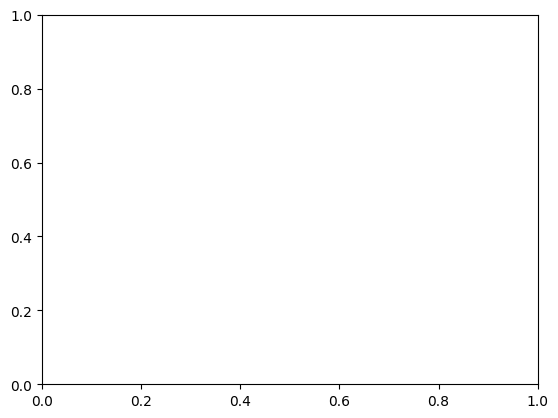

In [ ]:
# Now we can look at the score

plt.plot(range(1, iterations + 1), [np.median(score[i]) for i in range(len(score))])

In [ ]:
score

[47,
 35,
 59,
 75,
 1,
 55,
 7,
 7,
 39,
 10,
 1,
 1,
 1,
 8,
 11,
 2,
 38,
 7,
 1,
 2,
 32,
 26,
 32,
 4,
 12,
 9,
 3,
 1,
 1,
 3,
 5,
 7,
 1,
 1,
 2,
 1,
 6,
 2,
 9,
 11,
 8,
 2,
 7,
 1,
 14,
 16,
 1,
 9,
 6,
 4,
 9,
 16,
 1,
 6,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 16,
 1,
 4,
 16,
 1,
 4,
 3,
 1,
 1,
 1,
 3,
 8,
 2,
 7,
 7,
 8,
 2,
 1,
 4,
 3]